In [1]:
import os
from astropy.io import fits
from heeps.pupil.create_petal import create_petal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nframes = 100
npetals = 6
npupil = 285
DIT = 0.3
x = np.arange(nframes)*DIT

In [3]:
os.chdir(os.path.normpath(os.path.expandvars('$HOME/heeps_metis/input_files/wavefront/cbasic')))
cbas0 = fits.getdata('cube_Cbasic_20201105_600s_100ms_0piston_meters_scao_only_L_285.fits')[:nframes]
cbas1 = fits.getdata('cube_Cbasic_20210219_600s_100ms_0piston_meters_scao_only_L_285.fits')[:nframes]
cfull = fits.getdata('cube_Cbasic_20211004_600s_100ms_0piston_meters_scao_only_L_285.fits')[:nframes]
names = ['20201105_cbasic', '20210219_cbasic+', '20211004_cfull']

## WFE

20201105_cbasic WFE = 99.85 nm rms
20210219_cbasic+ WFE = 76.44 nm rms
20211004_cfull WFE = 92.32 nm rms


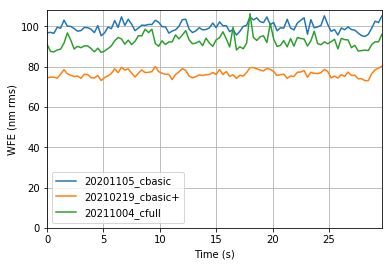

In [4]:
for name, cube in zip(names, [cbas0, cbas1, cfull]):
    rms = np.nanstd(cube, (1,2))*1e9
    mean_rms = np.mean(rms)
    print('%s WFE = %s nm rms'%(name,np.round(mean_rms,2)))
    plt.plot(x, rms, label=name)
plt.grid(True), plt.grid(which='minor', linestyle=':')
plt.xlabel('Time (s)')
plt.ylabel('WFE (nm rms)')
plt.xlim(0, x[-1])
plt.ylim(bottom=0)
plt.legend()
plt.savefig('verif_compass_WFE.png', transparent=True, dpi=300)

## Petal pistons

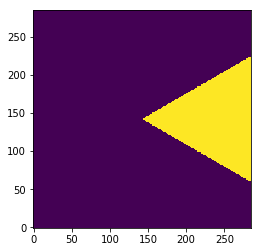

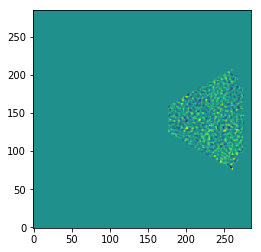

In [5]:
petals = np.float32([create_petal(x, npetals, npupil) for x in range(npetals)])
plt.imshow(petals[0], origin='lower')
plt.figure()
plt.imshow(cfull[0]*petals[0], origin='lower');

20201105_cbasic:
0, 1, 2, 3, 4, 5, 
petal pistons (nm rms) = [19.51 20.4  17.95 19.19 18.27 18.52]
mean petal piston = 18.97 nm rms
diff petal pistons (nm rms) = [23.76 33.28 33.9  32.74 23.52]
mean diff petal piston = 29.44 nm rms

20210219_cbasic+:
0, 1, 2, 3, 4, 5, 
petal pistons (nm rms) = [12.92 14.65 13.23 13.56 14.61 14.29]
mean petal piston = 13.87 nm rms
diff petal pistons (nm rms) = [13.32 23.49 24.2  24.57 15.54]
mean diff petal piston = 20.22 nm rms

20211004_cfull:
0, 1, 2, 3, 4, 5, 
petal pistons (nm rms) = [23.62 22.56 23.11 23.05 24.05 22.78]
mean petal piston = 23.19 nm rms
diff petal pistons (nm rms) = [14.11 44.79 45.26 45.37 16.31]
mean diff petal piston = 33.17 nm rms



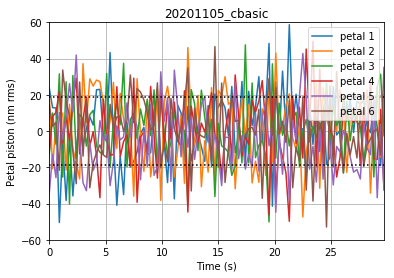

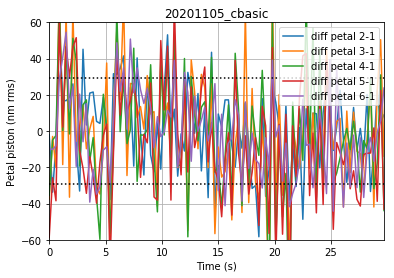

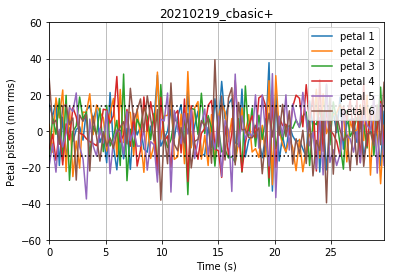

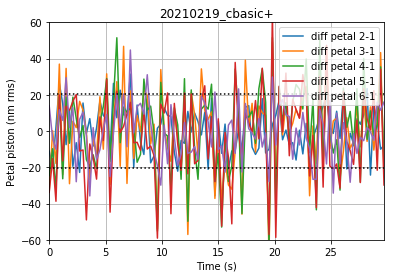

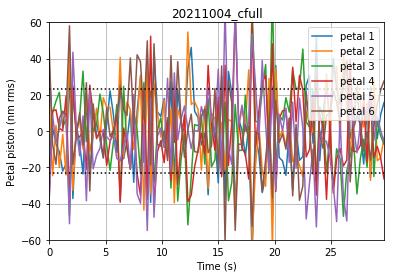

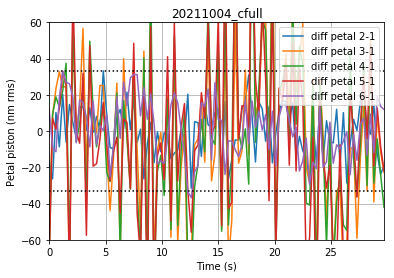

In [11]:
for name, cube in zip(names, [cbas0, cbas1, cfull]):
    print('%s:'%name)
    cube[cube!=cube] = 0 # remove NANs
    pistons = np.empty((npetals, nframes))
    for i, petal in enumerate(petals):
        print(i, end=', ')
        for j, frame in enumerate(cube):
            petal_frame = petal*frame*1e9
            pistons[i,j] = np.mean(petal_frame[petal_frame != 0])
    rms_pistons = np.std(pistons, axis=1)
    mean_piston = np.mean(rms_pistons)
    print('\npetal pistons (nm rms) = %s\nmean petal piston = %s nm rms'\
          %(np.round(rms_pistons,2), np.round(mean_piston,2)))
    diff_pistons = pistons - pistons[0]
    rms_diff_pistons = np.std(diff_pistons, axis=1)
    mean_diff_piston = np.mean(rms_diff_pistons[1:])
    print('diff petal pistons (nm rms) = %s\nmean diff petal piston = %s nm rms\n'\
          %(np.round(rms_diff_pistons[1:],2), np.round(mean_diff_piston,2)))
    plt.figure()
    lines = plt.plot(x, pistons.T)
    plt.legend(lines, ('petal 1','petal 2','petal 3','petal 4','petal 5','petal 6'), loc='upper right')
    plt.axhline(mean_piston, color='k', linestyle=':')
    plt.axhline(-mean_piston, color='k', linestyle=':')
    plt.grid(True), plt.grid(which='minor', linestyle=':')
    plt.xlabel('Time (s)')
    plt.ylabel('Petal piston (nm rms)')
    plt.title(name)
    plt.xlim(0, x[-1])
    plt.ylim(-60, 60)
    plt.savefig('petal_piston_%s.png'%name, transparent=True, dpi=300)
    plt.figure()
    lines = plt.plot(x, diff_pistons[1:].T)
    plt.legend(lines, ('diff petal 2-1','diff petal 3-1','diff petal 4-1','diff petal 5-1','diff petal 6-1'), loc='upper right')
    plt.axhline(mean_diff_piston, color='k', linestyle=':')
    plt.axhline(-mean_diff_piston, color='k', linestyle=':')
    plt.grid(True), plt.grid(which='minor', linestyle=':')
    plt.xlabel('Time (s)')
    plt.ylabel('Petal piston (nm rms)')
    plt.title(name)
    plt.xlim(0, x[-1])
    plt.ylim(-60, 60)
    plt.savefig('diff_petal_piston_%s.png'%name, transparent=True, dpi=300)